In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

In [55]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Training'
n_train_glioma = len(os.listdir(f'{train_dir}/glioma'))
n_train_mening = len(os.listdir(f'{train_dir}/meningioma'))
n_train_pit = len(os.listdir(f'{train_dir}/pituitary'))
n_train_non = len(os.listdir(f'{train_dir}/notumor'))


# Total length of the whole classes combined
total_train = n_train_glioma + n_train_mening + n_train_pit + n_train_non

In [56]:
# Count length
count = [n_train_glioma, n_train_mening, n_train_pit, n_train_non, total_train]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 1317
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 1331
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 1457
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 1595
----------------------------------------------------------------------------------------------------
Total counts of total images is 5700
----------------------------------------------------------------------------------------------------


In [57]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [n_train_glioma, n_train_mening, n_train_pit, n_train_non]

<ipython-input-58-ea309d3e31b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


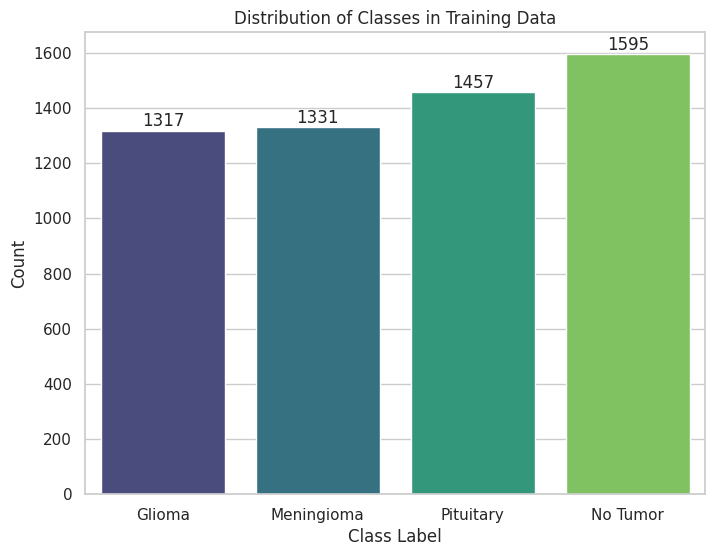

In [58]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [59]:
test_dir="/content/drive/MyDrive/Colab Notebooks/Testing"

n_test_glioma = len(os.listdir(f'{test_dir}/glioma'))
n_test_mening = len(os.listdir(f'{test_dir}/meningioma'))
n_test_pit = len(os.listdir(f'{test_dir}/pituitary'))
n_test_non = len(os.listdir(f'{test_dir}/notumor'))


# Total length of the whole classes combined
total_test = n_test_glioma + n_test_mening + n_test_pit + n_test_non

In [60]:
# Count length
count = [n_test_glioma, n_test_mening, n_test_pit, n_test_non, total_test]
length = ['glioma', ' meningioma', 'pituitary', 'no tumor', 'total images']

for i, sum in zip(length, count):
  print(f'Total counts of {i} is {sum}')
  print(100*'-')

Total counts of glioma is 300
----------------------------------------------------------------------------------------------------
Total counts of  meningioma is 306
----------------------------------------------------------------------------------------------------
Total counts of pituitary is 300
----------------------------------------------------------------------------------------------------
Total counts of no tumor is 405
----------------------------------------------------------------------------------------------------
Total counts of total images is 1311
----------------------------------------------------------------------------------------------------


In [61]:
class_labels = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']
class_counts = [n_test_glioma, n_test_mening, n_test_pit, n_test_non]

<ipython-input-62-bcf986257a76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")


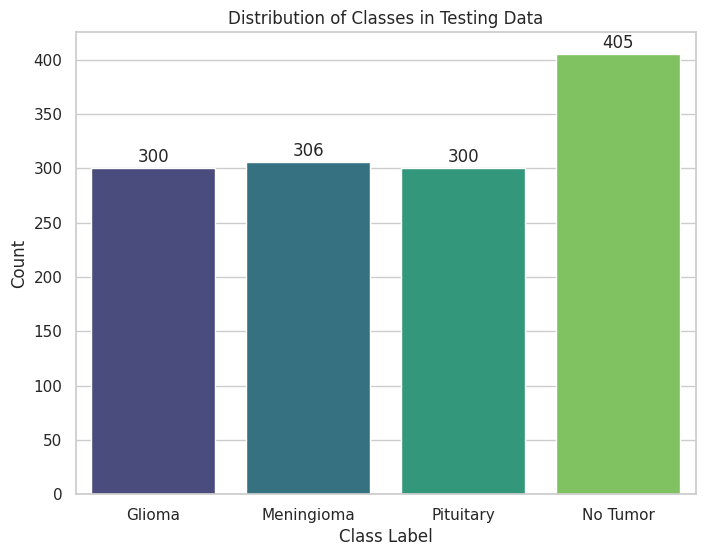

In [62]:
# Create a countplot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_labels, y=class_counts, palette="viridis")

# Annotate the counts on top of the bars
for i, count in enumerate(class_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

In [63]:
###Generating images for Training set
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=40,
                                 width_shift_range=0.05,
                                 height_shift_range=0.05,
                                 zoom_range=0.1,
                                 shear_range=0.1,
                                 horizontal_flip=True,
                                 vertical_flip=False,
                                 fill_mode='nearest')
###Generating images for Test set
test_datagen=ImageDataGenerator(rescale=1./255)

In [64]:
###Creating Training set
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')
###Creating validation set
test_set=test_datagen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=16,
                                          class_mode="categorical")

Found 5700 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [65]:
batch_size=16
color_channel=3#most of the  pre trained model use rgb eg.imagenet
image_shape=(224,224,3) #for uniformity

In [66]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, ResNet101
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Reshape, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import regularizers


In [48]:
# Define the model vgg 16 from scractch
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=image_shape)) #(3,3)kernal values , filter the images #padding, for same pixel and dimensions hgt and width

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2))) #to avoid overfitting
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 4
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_labels), activation='softmax'))

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 14, 14, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 59,284,548 (226.15 MB)

 Trainable params: 59,282,628 (226.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [49]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Define callbacks
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen1/VGG16.keras', monitor='val_accuracy', save_best_only=True)



# Train the model
history1 = model.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[checkpoint]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 169s 417ms/step - accuracy: 0.4257 - loss: 8.0869 - val_accuracy: 0.2182 - val_loss: 1.5543
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 402ms/step - accuracy: 0.3800 - loss: 1.2695 - val_accuracy: 0.2807 - val_loss: 1.3713
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 198s 392ms/step - accuracy: 0.4174 - loss: 1.2476 - val_accuracy: 0.5431 - val_loss: 1.5651
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 339ms/step - accuracy: 0.4260 - loss: 1.2746 - val_accuracy: 0.4401 - val_loss: 1.9364
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 347ms/step - accuracy: 0.3907 - loss: 1.2915 - val_accuracy: 0.4287 - val_loss: 1.2635
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 122s 338ms/step - accuracy: 0.4483 - loss: 1.2513 - val_accuracy: 0.5072 - val_loss: 1.1514
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 335ms/step - accuracy: 0.4696 - loss: 1.1925 - val_accuracy: 0.3585 - val_loss: 6.5031
Epoch 8/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 123s 339ms/step - accuracy: 0.5375 - loss: 1.06

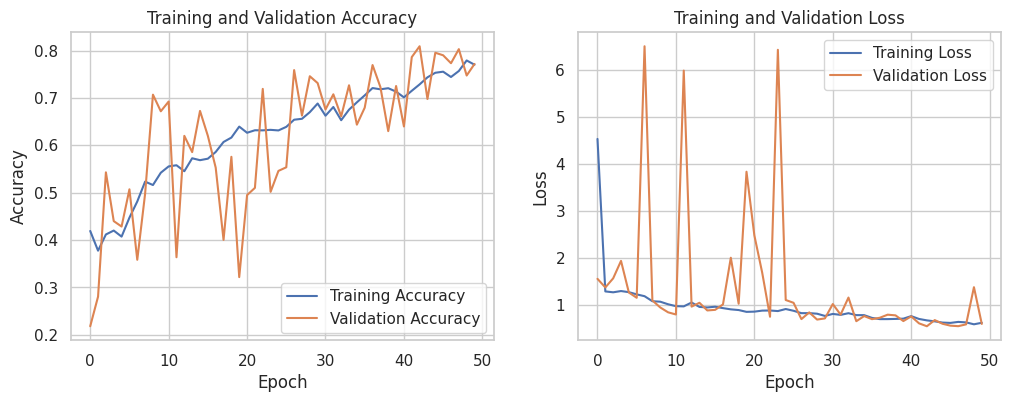

In [50]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

### Inception V3

In [51]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add a dropout layer to prevent overfitting
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_labels), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_16    │ (None, 111, 111, 32)   │             96 │ conv2d_40[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 109, 109, 32)   │             96 │ conv2d_41[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 109, 109, 64)   │            192 │ conv2d_42[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 54, 54, 80)     │            240 │ conv2d_43[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_44 (Conv2D)        │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 52, 52, 192)    │            576 │ conv2d_44[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,905,060 (91.19 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [68]:

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Datagen1/InceptionV3.keras', monitor='val_accuracy', save_best_only=True)



history = model.fit(
    training_set,
    epochs=75,
    validation_data=test_set,
    callbacks=[checkpoint]
)


Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 157s 361ms/step - accuracy: 0.6704 - loss: 0.9664 - val_accuracy: 0.7841 - val_loss: 0.5443
Epoch 2/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 287ms/step - accuracy: 0.8135 - loss: 0.4892 - val_accuracy: 0.8436 - val_loss: 0.4216
Epoch 3/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 104s 287ms/step - accuracy: 0.8166 - loss: 0.4597 - val_accuracy: 0.8368 - val_loss: 0.4183
Epoch 4/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 143s 291ms/step - accuracy: 0.8388 - loss: 0.4261 - val_accuracy: 0.8658 - val_loss: 0.3720
Epoch 5/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 135s 273ms/step - accuracy: 0.8473 - loss: 0.3978 - val_accuracy: 0.8177 - val_loss: 0.4454
Epoch 6/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 146s 281ms/step - accuracy: 0.8505 - loss: 0.4091 - val_accuracy: 0.8520 - val_loss: 0.3699
Epoch 7/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 145s 292ms/step - accuracy: 0.8539 - loss: 0.3679 - val_accuracy: 0.8665 - val_loss: 0.3501
Epoch 8/75
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 292ms/step - accuracy: 0.8639 - loss: 0.36

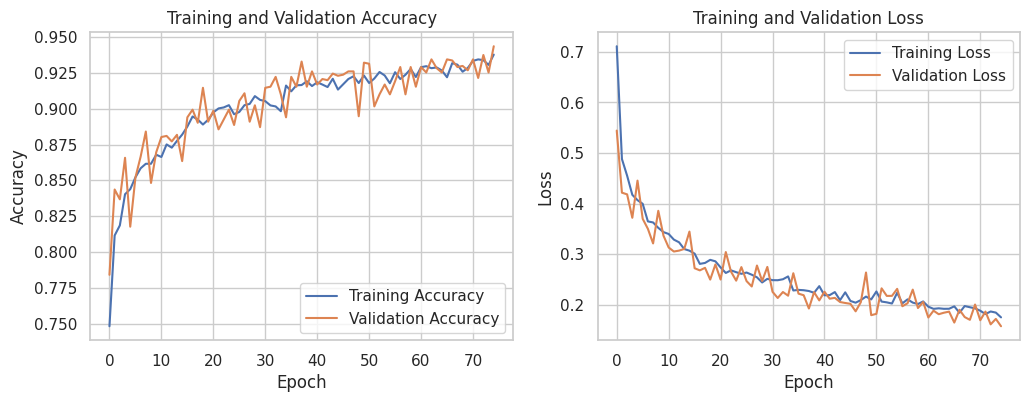

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [70]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=image_shape)


for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [71]:
model.summary()

ValueError: Undefined shapes are not supported.